In [1]:
import numpy as np
import pandas as pd
import sounddevice as sd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft

https://python-sounddevice.readthedocs.io/en/0.4.7/usage.html#playback

## choose default device for input and output  
and test it

In [5]:

sd.query_devices()

>  0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
   1 Stereomix (Realtek(R) Audio), MME (2 in, 0 out)
   2 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Speaker (Realtek(R) Audio), MME (0 in, 2 out)
   5 Primärer Soundaufnahmetreiber, Windows DirectSound (2 in, 0 out)
   6 Stereomix (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   7 Microphone Array (Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   8 Primärer Soundtreiber, Windows DirectSound (0 in, 2 out)
   9 Speaker (Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  10 Speaker (Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  11 Microphone Array (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  12 Stereomix (Realtek(R) Audio), Windows WASAPI (2 in, 0 out)
  13 Mic in at front panel (black) (Mic in at front panel (black)), Windows WDM-KS (2 in, 0 out)
  14 Speakers 1 (Realtek HD Audio output with HAP), Windows WDM-KS (0 in, 2 out)
  15 Speak

In [7]:

# select default device from the list and test it
#[microfon, speaker]
sd.default.device = [2,4]

# Define parameters
duration = 5  # seconds
sample_rate = 44100  # Hz

# Number of frames to record
frames = int(duration * sample_rate)

# Record audio
print("Recording...")
audio_signal = sd.rec(frames, samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

# Flatten the recorded signal (if necessary)
audio_signal = audio_signal.flatten()

# Print shape of the recorded signal
print("Recorded signal shape:", audio_signal.shape)

sd.play(audio_signal)

Recording...
Recording finished.
Recorded signal shape: (220500,)


In [3]:
sd.play(audio_signal)

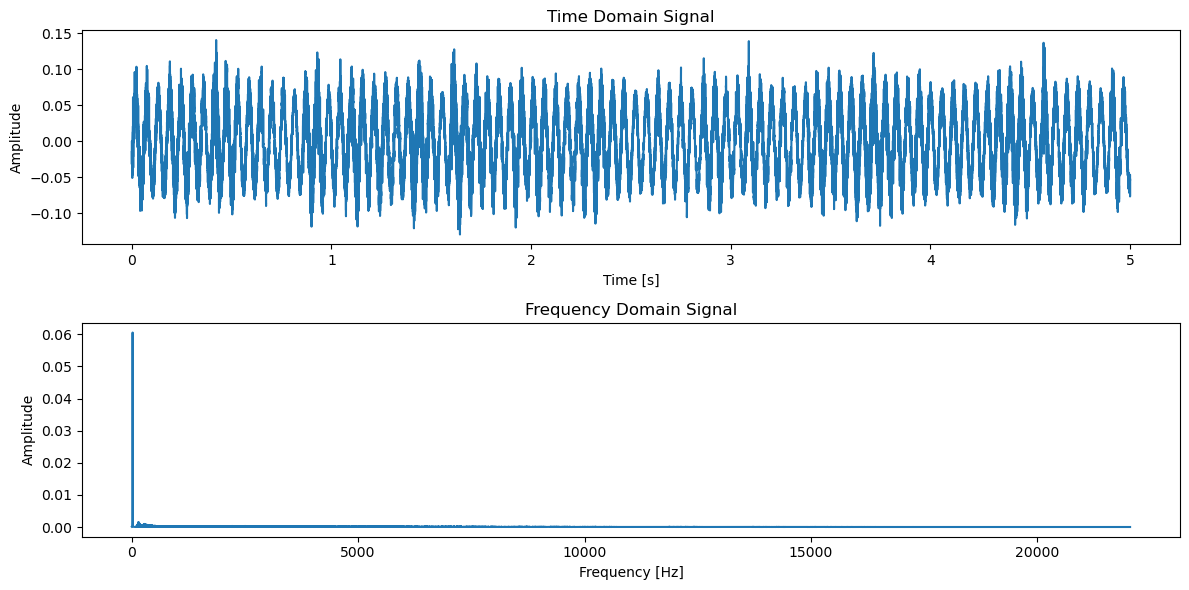

In [4]:
def analyze_audio_signal(audio_signal):
    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(2, 1, 2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

# Example usage
analyze_audio_signal(audio_signal)

Recording...
Recording finished.
Playing back the recorded audio...
Playback finished.


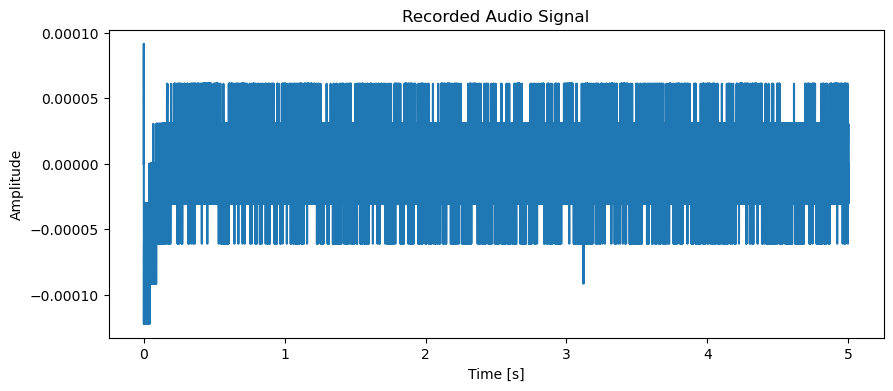

In [13]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

def test_sd_rec(duration=5, sample_rate=44100):
    # Define parameters
    channels = 1  # Mono

    # Record audio
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")

    # Play back the recorded audio
    print("Playing back the recorded audio...")
    sd.play(audio_signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print("Playback finished.")

    # Plot the recorded signal
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_signal)
    plt.title("Recorded Audio Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

# Run the test
test_sd_rec()


## fft analysis microphon 
works with streaming from streaming tv  
but not from voice

Recording...
Recording finished.


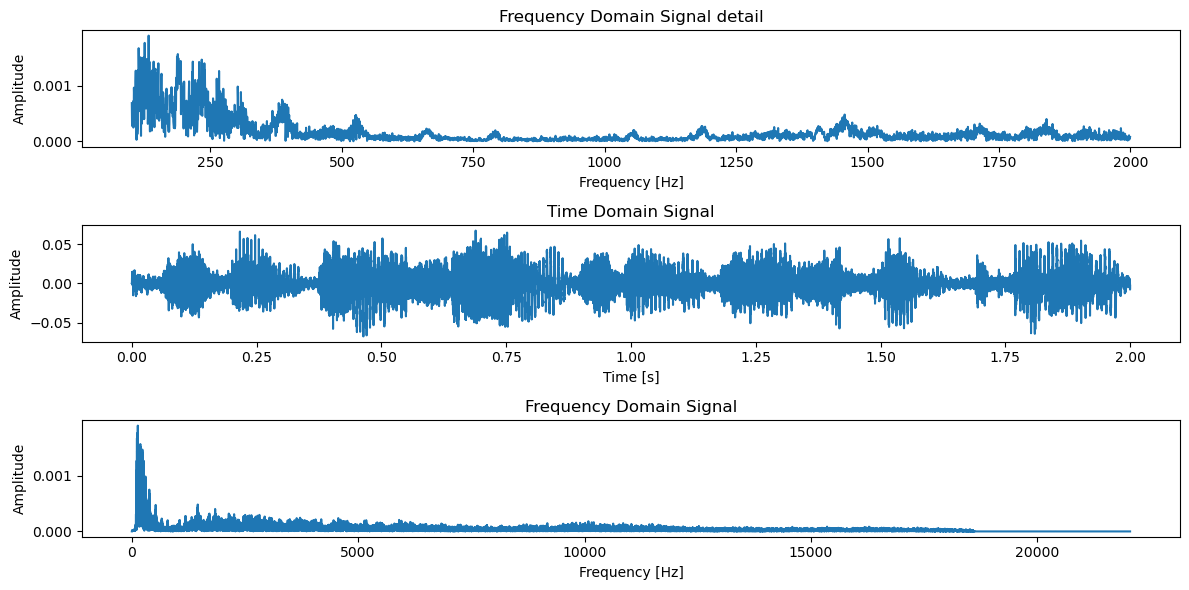

In [29]:


def analyze_microphone_signal(duration=2, sample_rate=44100):
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")
    
    sd.play(audio_signal)

    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 2)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(3, 1, 3)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    yf = 2.0/N * np.abs(yf[:N//2])
    xf = np.fft.fftfreq(N, T)[:N//2]
    df_f = pd.DataFrame({'f': xf,
                         'psd': yf})

    plt.subplot(3, 1, 1)
    sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
    #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal detail")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

    

# Example usage
analyze_microphone_signal(duration = 2)
